In [1]:
from env.workload import Workload, Workflow
from schedule.taskNcpEnv import TaskAndNcpEnvironment
from schedule.schedule import Scheduler
from model.hyperparameter import get_args
from model.dqn import DQN
from model.sparse_gat import SpGAT
import datetime
import time
import pickle
import sys
import os

parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)
from load_balancing.server_client import *

args = get_args()
args.debug = False

In [2]:
def train(agent, train_wf_path, save_model_path,model, xhn_works, xhn_nodes):
  mean_makespan = []
  mean_cost = []
  load_balance = []
  time_rate = []
  cost_rate = []
  success_both_rate = []

  model.train()
  agent.net.train(True)
  scheduler = Scheduler(agent, model, args)
  print("start at:", str(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")))
  start = time.time()
        
  for episode in range(1, args.episode_number+1):
    Workflow.reset()
    Workload.reset()
  
    print("episode:",episode,"="*70)
    t, lb, tr, dcsm = TaskAndNcpEnvironment(train_wf_path, scheduler, episode*10, args, method="dqn", xhn_works=xhn_works, xhn_nodes=xhn_nodes);
    mean_makespan.append(t)
    load_balance.append(lb)
    time_rate.append(tr)
        
  s = str(datetime.timedelta(seconds=time.time()-start))
  print("total train time:", s)
  scheduler.trainPlotFinal(mean_makespan, load_balance, time_rate)
  scheduler.save_hyperparameters(args)
  agent.save_model(save_model_path)

In [3]:
def deal_tasks_hr(xhn_works, xhn_nodes):
    train_generator = 'generator'
    save_model_path_generator = '_generator.pth'

    model = SpGAT(args.nfeat, args.hidden, args.out_feature, args.dropout, args.alpha, args.nb_heads).to(args.device)

    agent1 = DQN(args, model)
    train(agent1, train_generator, save_model_path_generator, model, xhn_works, xhn_nodes)

start at: 2025-05-11 12:31:53
episode: 1 ======================================================================
[92520.00 - Releaser  ] vm192.168.1.7:60001 virtual machine is released. vm tasks num = 2. 
[92520.00 - Releaser  ] vm192.168.1.7:60005 virtual machine is released. vm tasks num = 4. 
[92520.00 - Releaser  ] vm192.168.1.7:60004 virtual machine is released. vm tasks num = 2. 
[92520.00 - Releaser  ] vm192.168.1.7:60011 virtual machine is released. vm tasks num = 2. 
[92520.00 - Releaser  ] vm192.168.1.7:60009 virtual machine is released. vm tasks num = 4. 
[92520.00 - Releaser  ] vm192.168.1.7:60006 virtual machine is released. vm tasks num = 3. 
[92520.00 - Releaser  ] vm192.168.1.7:60017 virtual machine is released. vm tasks num = 3. 
[92520.00 - Releaser  ] vm192.168.1.7:60008 virtual machine is released. vm tasks num = 6. 
[92520.00 - Releaser  ] vm192.168.1.7:60024 virtual machine is released. vm tasks num = 4. 
[92520.00 - Releaser  ] vm192.168.1.7:60016 virtual machine 

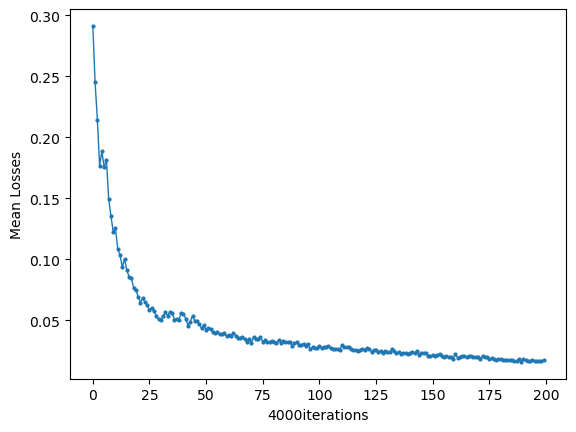

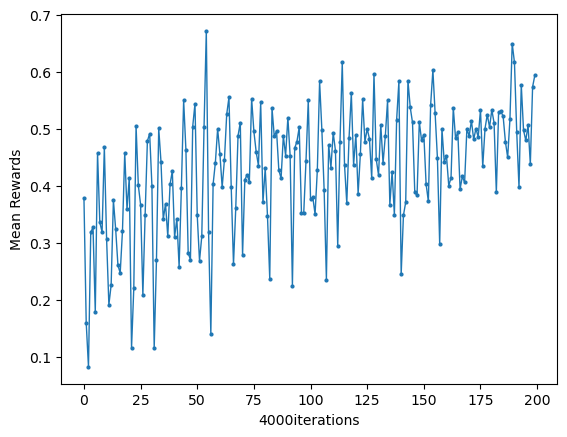

[64800.00 - Releaser  ] vm192.168.1.7:60001 virtual machine is released. vm tasks num = 4. 
[64800.00 - Releaser  ] vm192.168.1.7:60005 virtual machine is released. vm tasks num = 3. 
[64800.00 - Releaser  ] vm192.168.1.7:60004 virtual machine is released. vm tasks num = 4. 
[64800.00 - Releaser  ] vm192.168.1.7:60011 virtual machine is released. vm tasks num = 3. 
[64800.00 - Releaser  ] vm192.168.1.7:60009 virtual machine is released. vm tasks num = 5. 
[64800.00 - Releaser  ] vm192.168.1.7:60006 virtual machine is released. vm tasks num = 3. 
[64800.00 - Releaser  ] vm192.168.1.7:60017 virtual machine is released. vm tasks num = 3. 
[64800.00 - Releaser  ] vm192.168.1.7:60014 virtual machine is released. vm tasks num = 2. 
[64800.00 - Releaser  ] vm192.168.1.7:60008 virtual machine is released. vm tasks num = 4. 
[64800.00 - Releaser  ] vm192.168.1.7:60024 virtual machine is released. vm tasks num = 2. 
[64800.00 - Releaser  ] vm192.168.1.7:60016 virtual machine is released. vm task

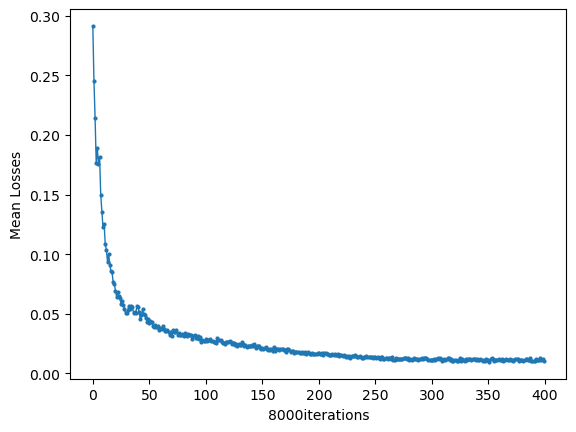

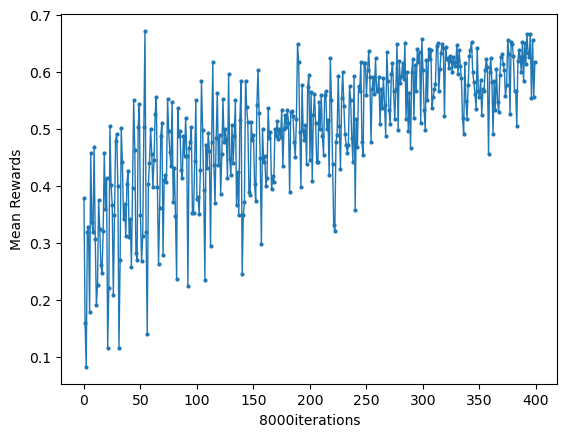

[92520.00 - Releaser  ] vm192.168.1.7:60001 virtual machine is released. vm tasks num = 3. 
[92520.00 - Releaser  ] vm192.168.1.7:60005 virtual machine is released. vm tasks num = 3. 
[92520.00 - Releaser  ] vm192.168.1.7:60004 virtual machine is released. vm tasks num = 3. 
[92520.00 - Releaser  ] vm192.168.1.7:60011 virtual machine is released. vm tasks num = 3. 
[92520.00 - Releaser  ] vm192.168.1.7:60009 virtual machine is released. vm tasks num = 3. 
[92520.00 - Releaser  ] vm192.168.1.7:60006 virtual machine is released. vm tasks num = 3. 
[92520.00 - Releaser  ] vm192.168.1.7:60017 virtual machine is released. vm tasks num = 4. 
[92520.00 - Releaser  ] vm192.168.1.7:60014 virtual machine is released. vm tasks num = 4. 
[92520.00 - Releaser  ] vm192.168.1.7:60008 virtual machine is released. vm tasks num = 3. 
[92520.00 - Releaser  ] vm192.168.1.7:60024 virtual machine is released. vm tasks num = 3. 
[92520.00 - Releaser  ] vm192.168.1.7:60016 virtual machine is released. vm task

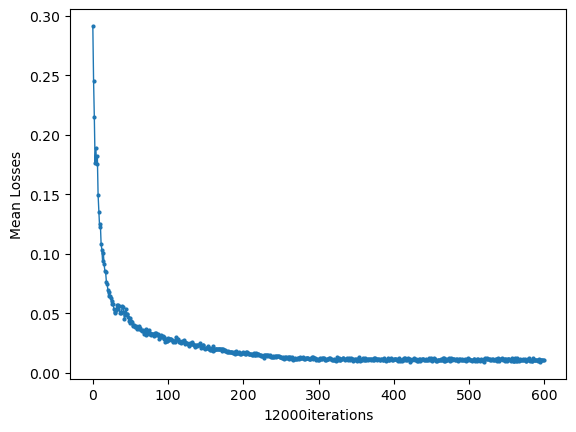

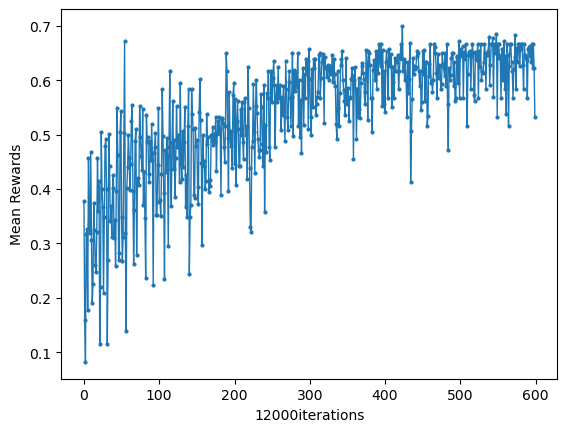

[64800.00 - Releaser  ] vm192.168.1.7:60001 virtual machine is released. vm tasks num = 3. 
[64800.00 - Releaser  ] vm192.168.1.7:60005 virtual machine is released. vm tasks num = 3. 
[64800.00 - Releaser  ] vm192.168.1.7:60004 virtual machine is released. vm tasks num = 2. 
[64800.00 - Releaser  ] vm192.168.1.7:60011 virtual machine is released. vm tasks num = 4. 
[64800.00 - Releaser  ] vm192.168.1.7:60009 virtual machine is released. vm tasks num = 3. 
[64800.00 - Releaser  ] vm192.168.1.7:60006 virtual machine is released. vm tasks num = 4. 
[64800.00 - Releaser  ] vm192.168.1.7:60014 virtual machine is released. vm tasks num = 4. 
[64800.00 - Releaser  ] vm192.168.1.7:60008 virtual machine is released. vm tasks num = 3. 
[64800.00 - Releaser  ] vm192.168.1.7:60024 virtual machine is released. vm tasks num = 3. 
[64800.00 - Releaser  ] vm192.168.1.7:60016 virtual machine is released. vm tasks num = 3. 
[64800.00 - Releaser  ] vm192.168.1.7:60007 virtual machine is released. vm task

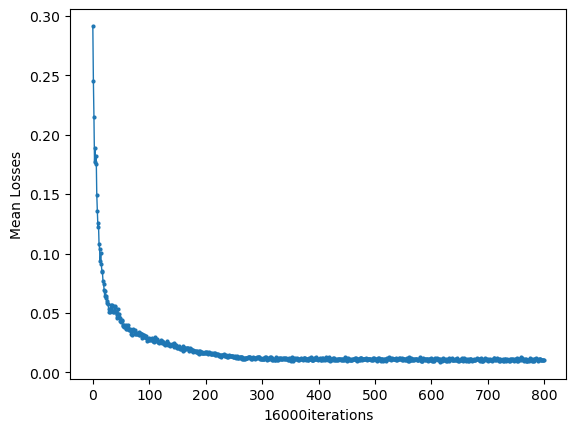

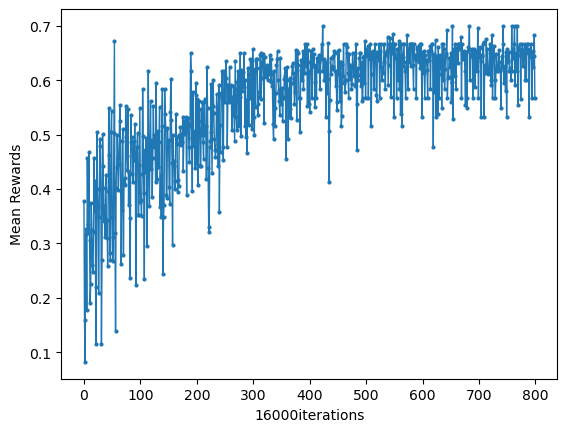

[55440.00 - Releaser  ] vm192.168.1.7:60005 virtual machine is released. vm tasks num = 3. 
[55440.00 - Releaser  ] vm192.168.1.7:60011 virtual machine is released. vm tasks num = 3. 
[55440.00 - Releaser  ] vm192.168.1.7:60009 virtual machine is released. vm tasks num = 3. 
[55440.00 - Releaser  ] vm192.168.1.7:60006 virtual machine is released. vm tasks num = 3. 
[55440.00 - Releaser  ] vm192.168.1.7:60017 virtual machine is released. vm tasks num = 3. 
[55440.00 - Releaser  ] vm192.168.1.7:60014 virtual machine is released. vm tasks num = 3. 
[55440.00 - Releaser  ] vm192.168.1.7:60008 virtual machine is released. vm tasks num = 3. 
[55440.00 - Releaser  ] vm192.168.1.7:60016 virtual machine is released. vm tasks num = 4. 
[55440.00 - Releaser  ] vm192.168.1.7:60007 virtual machine is released. vm tasks num = 3. 
[55440.00 - Releaser  ] vm192.168.1.7:60010 virtual machine is released. vm tasks num = 3. 
[55440.00 - Releaser  ] vm192.168.1.7:60012 virtual machine is released. vm task

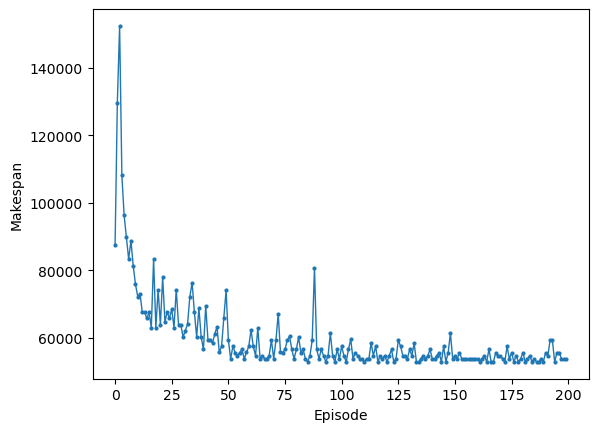

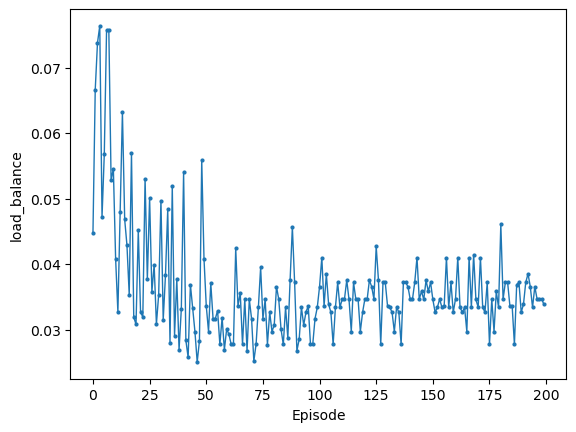

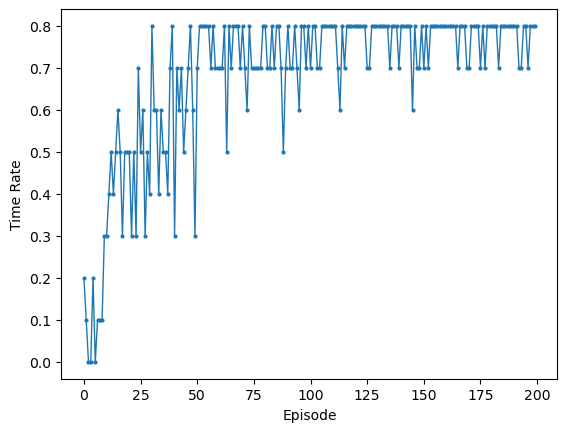

<Figure size 640x480 with 0 Axes>

In [4]:
import csv
import ast
csv_file_path = './task_data.csv'
csv_file_path2 = './ncp_data.csv'

class Node:
    def __init__(self, name, deal_speed, left_bandwidth, cpu_used_rate):
        self.name = name
        self.deal_speed = deal_speed
        self.left_bandwidth = left_bandwidth
        self.cpu_used_rate = cpu_used_rate


# 打开CSV文件并读取数据
with open(csv_file_path, 'r', encoding='utf-8') as csvfile:
    xhn_works = []
    works = csv.reader(csvfile)
    for row in works:
        # 对每行中的每个字符串进行解析
        parsed_row = []
        for str_item in row:
            try:
                # 使用 ast.literal_eval 转换为 Python 对象
                parsed_item = ast.literal_eval(str_item)
                parsed_row.append(parsed_item)
            except SyntaxError:
                print(f"无法解析字符串: {str_item}")
        xhn_works.append(parsed_row)

with open(csv_file_path2, 'r', encoding='utf-8') as csvfile:
    xhn_nodes = []
    nodes = csv.reader(csvfile)
    for row in nodes:
        node = Node(row[0], float(row[1]), int(row[2]), float(row[3]))
        xhn_nodes.append(node)
        if len(xhn_nodes) == args.action_num:
            break

deal_tasks_hr(xhn_works, xhn_nodes[0:args.action_num])

In [5]:
# from threading import Thread
# from smart_node import real_node

# client = build_recv_server("0.0.0.0", 5008)

# xhn_works = []
# my_threads=[]
# while True:
#     while True:
#         client_socket, client_address = client.accept()
#         data = recv_from_server(client_socket)
#         msg = pickle.loads(data)
#         xhn_work = msg.content
#         xhn_works.append(xhn_work)
#         if len(xhn_works) == 10:
#             print("end")
#             break
        

#     query_msg = message()
#     query_msg.type = "get_nodes_info"
#     query_data = pickle.dumps(query_msg)
#     client1 = build_send_client("192.168.1.7", 5002)
#     send_to_server(client1, query_data)
#     ans = recv_from_server(client1)
#     ans_tmp = pickle.loads(ans)
#     xhn_nodes = ans_tmp.content
#     print(len(xhn_nodes))

#     import csv

#     # 示例数组
#     # 定义CSV文件路径
#     csv_file_path = 'D:/code/python_project/zgq/load_balancing/task_data.csv'
#     csv_file_path2 = 'D:/code/python_project/zgq/load_balancing/ncp_data.csv'

#     # 打开CSV文件并写入数据
#     with open(csv_file_path, 'w', newline='', encoding='utf-8') as csvfile:
#         writer = csv.writer(csvfile)
#         # 写入每一行数据
#         for row in xhn_works:
#             writer.writerow(row)
            
#     with open(csv_file_path2, 'w', newline='', encoding='utf-8') as csvfile:
#         writer = csv.writer(csvfile)
#         for row in xhn_nodes:
#             writer.writerow((row.name, row.deal_speed, row.left_bandwidth))

#     thread=Thread(target = deal_tasks_hr, args=(xhn_works, xhn_nodes))
#     my_threads.append(thread)
#     thread.start()